In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import numpy as np
from math import atan

In [17]:
# car dimensions
LENGTH = 20
WIDTH = 10

# landmark co-ordinates
X1 = 150
Y1 = 75
X2 = 175
Y2 = 160

In [4]:
def car(coords, angle, length=LENGTH, width=WIDTH):
    car = patches.Rectangle(coords, length, width, angle=angle, facecolor='b', rotation_point='center')
    return car

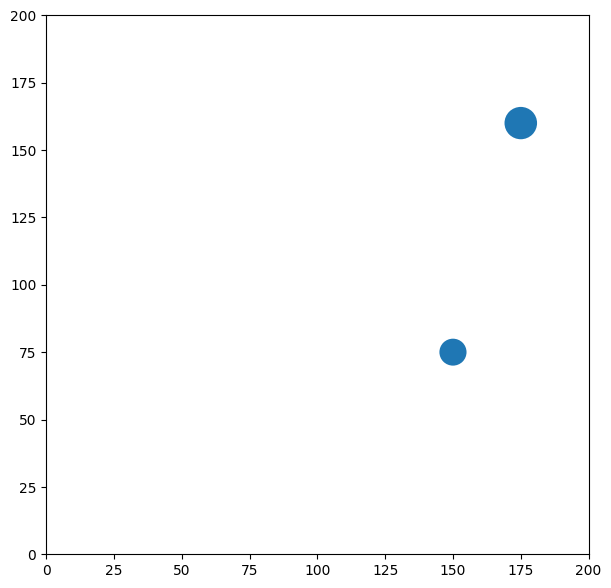

In [8]:
# create plots
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)
ax.add_patch(patches.Circle((X1, Y1), 5))
ax.add_patch(patches.Circle((X1, Y2), 6))

# polynomial function
t = np.array(np.arange(1, 100, 0.5))
x = np.array(t**2/100+2)
y = np.array(x**2/50+4)
slopes = np.array(2*x/50)
radian_angles = np.arctan(slopes)
angles = np.rad2deg(radian_angles)

# print(slopes, angles)

# create car
current_car = car((x[0], y[0]), angles[0])

# animation functions
def init():
    ax.add_patch(current_car)
    return current_car,

def animate(i):
    current_car.set_xy([x[i], y[i]])
    current_car.set_angle(angles[i])
    return current_car,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(t), blit=True)

anim.save('car-traversal.mp4', writer = 'ffmpeg', fps = 10)

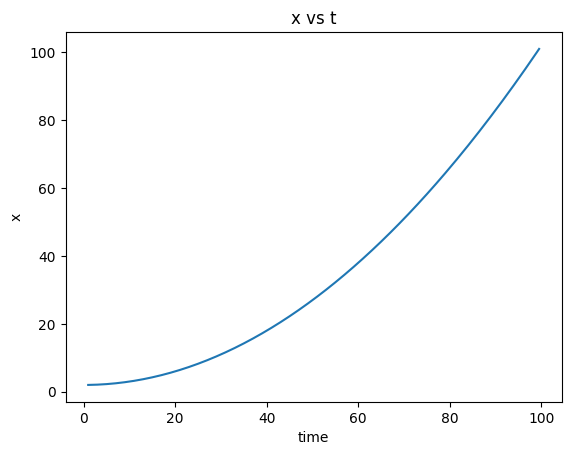

In [14]:
plt.plot(t, x)
plt.title('x vs t')
plt.xlabel('time')
plt.ylabel('x')
plt.show()

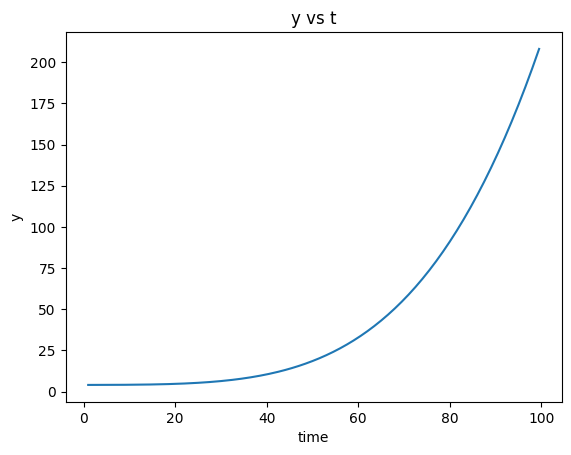

In [15]:
plt.plot(t, y)
plt.title('y vs t')
plt.xlabel('time')
plt.ylabel('y')
plt.show()

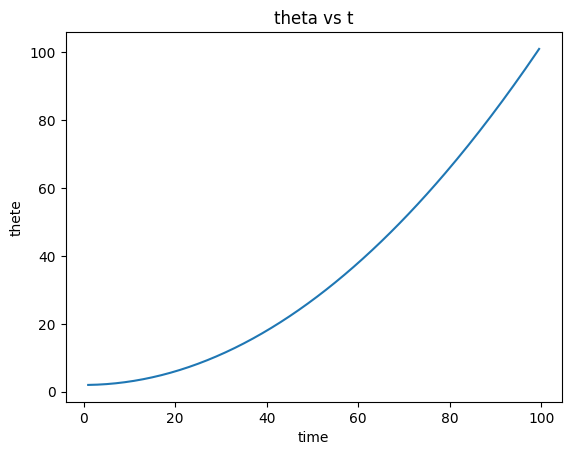

In [16]:
plt.plot(t, x)
plt.title('theta vs t')
plt.xlabel('time')
plt.ylabel('thete')
plt.show()

In [21]:
# distance between car and landmarks
d1_raw = np.sqrt((x-X1)**2 + (y-Y1)**2)
d2_raw = np.sqrt((x-X2)**2 + (y-Y2)**2)

# noise
noice = np.random.normal(0, 5, len(t))

# add noise to distances
d1 = d1_raw + noice
d2 = d2_raw + noice

# NOICE

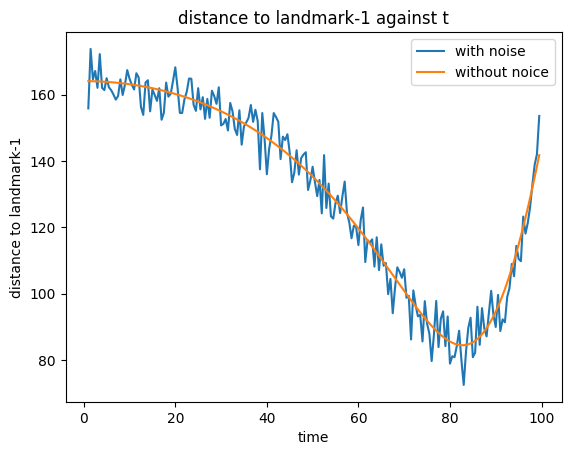

In [30]:
plt.plot(t, d1)
plt.plot(t, d1_raw)
plt.title('distance to landmark-1 against t')
plt.xlabel('time')
plt.ylabel('distance to landmark-1')
plt.legend(['with noise', 'without noice'])
plt.show()

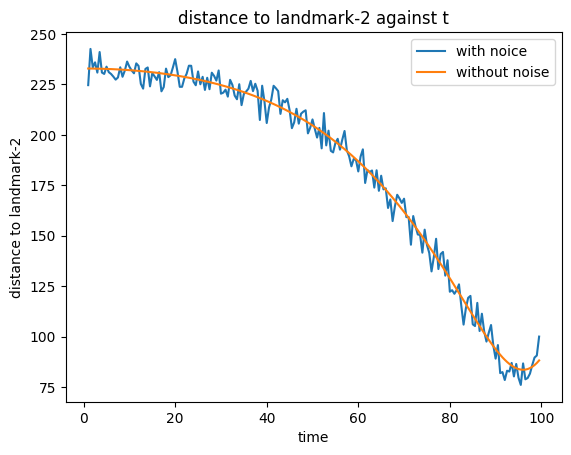

In [31]:
plt.plot(t, d2)
plt.plot(t, d2_raw)
plt.title('distance to landmark-2 against t')
plt.xlabel('time')
plt.ylabel('distance to landmark-2')
plt.legend(['with noice', 'without noise'])
plt.show()